## Face Recogntion with Image

 - Install dlib package in your laptop via this https://gist.github.com/ageitgey/629d75c1baac34dfa5ca2a1928a7aeaf

In [33]:
# testing out code to extract out face locations
import face_recognition
image = face_recognition.load_image_file("/home/knolly/Downloads/image.tif")
face_locations = face_recognition.face_locations(image)

In [34]:
print(face_locations)

[(106, 275, 196, 185), (343, 703, 386, 660), (223, 688, 266, 645), (137, 530, 180, 487), (46, 530, 89, 487), (66, 417, 102, 381), (331, 435, 383, 383), (238, 40, 281, 0), (337, 573, 389, 521), (151, 59, 194, 16)]


In [49]:
face_recognition.face_encodings(image)[0]

array([-0.13031322,  0.14030647, -0.03303921,  0.04284958, -0.0456094 ,
       -0.02440508, -0.02862037, -0.13245477,  0.17511807, -0.12806621,
        0.17134506, -0.0563608 , -0.2034696 ,  0.02952888, -0.00408883,
        0.12367791, -0.16304457, -0.09518214, -0.19280732, -0.1099303 ,
        0.02146278,  0.0394188 , -0.02272201, -0.03234097, -0.14370444,
       -0.2623969 , -0.04512205,  0.00308961,  0.14144759, -0.04161252,
       -0.02194447,  0.0461417 , -0.23018387, -0.11723492,  0.09126464,
        0.10519221, -0.04820073,  0.03986094,  0.25682977,  0.0011976 ,
       -0.15754381,  0.03915998,  0.09533136,  0.25067285,  0.12742412,
        0.0628336 , -0.00543575, -0.1250194 ,  0.06961744, -0.23852865,
       -0.02469054,  0.14583135,  0.21473612,  0.1550176 ,  0.06096067,
       -0.23459214,  0.01407755,  0.10119022, -0.12525879,  0.11752509,
        0.09067582, -0.13279697, -0.0080273 ,  0.02096502,  0.20984998,
        0.04605998, -0.08054154, -0.13795166,  0.21638487, -0.10

In [51]:
face_recognition.face_landmarks(image)[0]

{'chin': [(182, 126),
  (183, 138),
  (183, 149),
  (184, 160),
  (188, 171),
  (194, 180),
  (203, 188),
  (213, 194),
  (225, 196),
  (237, 194),
  (246, 187),
  (253, 179),
  (258, 169),
  (260, 160),
  (261, 150),
  (262, 141),
  (263, 131)],
 'left_eyebrow': [(196, 122), (201, 116), (209, 113), (217, 113), (224, 116)],
 'right_eyebrow': [(234, 117), (241, 115), (250, 115), (257, 119), (259, 126)],
 'nose_bridge': [(230, 124), (231, 131), (231, 139), (232, 148)],
 'nose_tip': [(220, 149), (224, 152), (230, 154), (235, 153), (238, 150)],
 'left_eye': [(203, 126),
  (208, 123),
  (213, 123),
  (217, 126),
  (212, 127),
  (208, 127)],
 'right_eye': [(238, 128),
  (243, 125),
  (248, 125),
  (252, 129),
  (248, 129),
  (243, 129)],
 'top_lip': [(206, 161),
  (214, 159),
  (222, 160),
  (228, 161),
  (233, 160),
  (239, 161),
  (245, 163),
  (243, 163),
  (233, 162),
  (228, 162),
  (222, 161),
  (208, 161)],
 'bottom_lip': [(245, 163),
  (239, 170),
  (233, 173),
  (227, 174),
  (221, 

In [45]:
image_path = "/home/knolly/Downloads/faces.jpg"

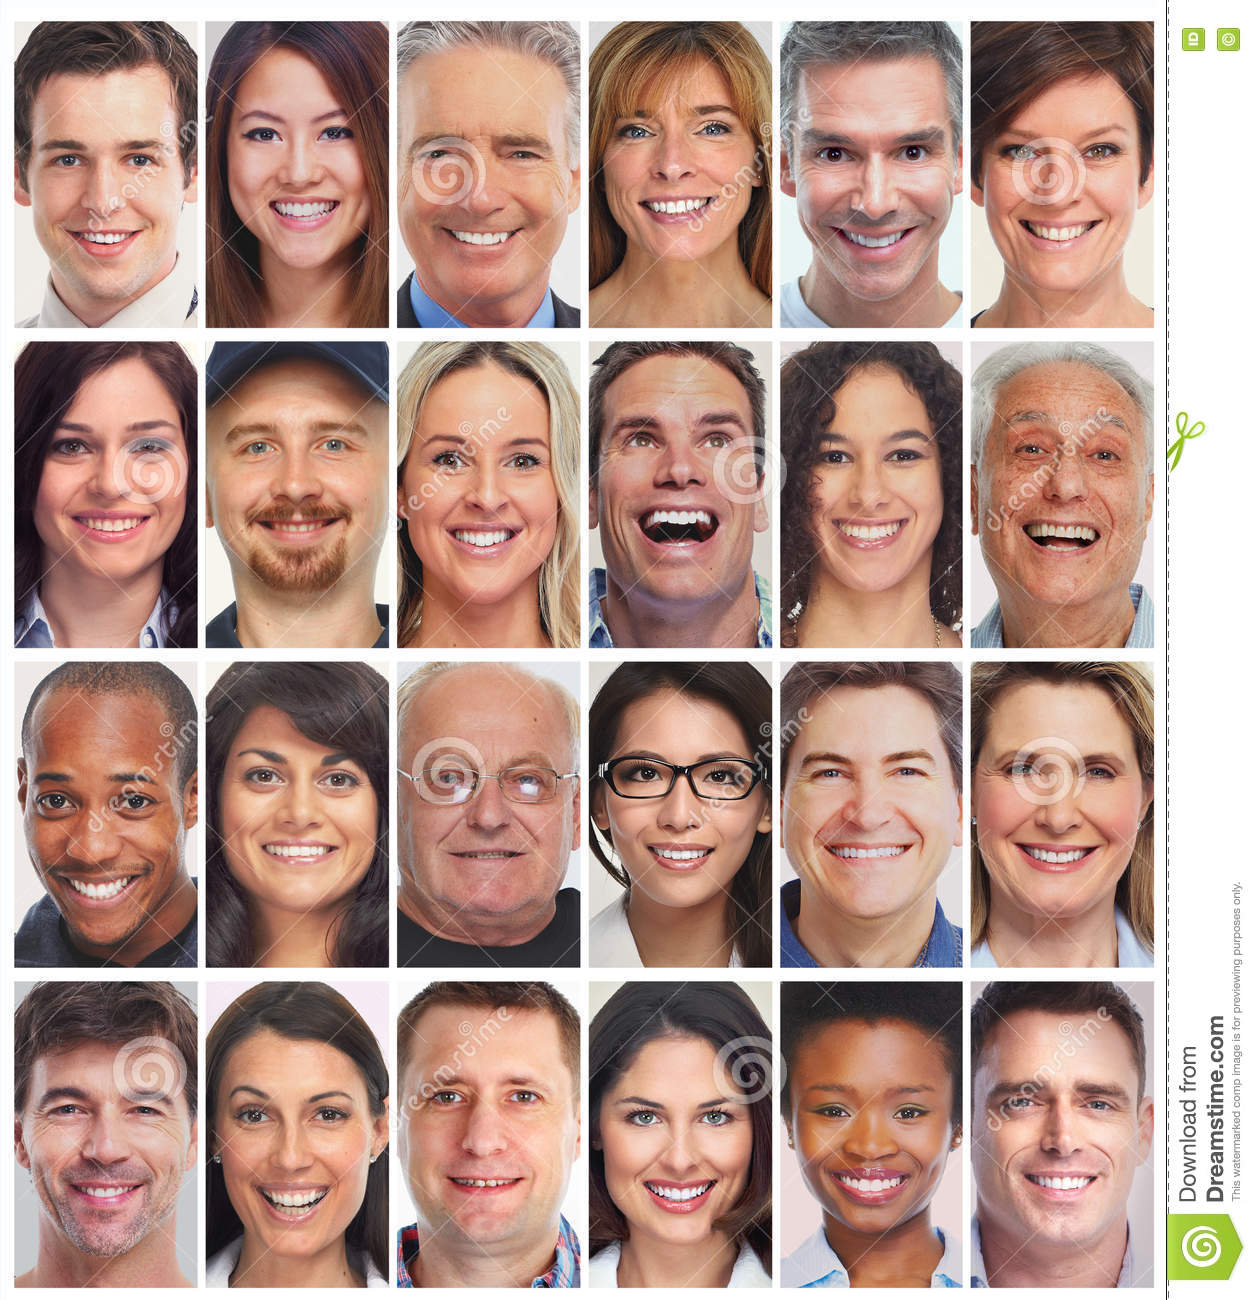

In [46]:
from PIL import Image, ImageDraw
from IPython.display import display

# The program we will be finding faces on the example below
pil_im = Image.open(image_path)
display(pil_im)

In [42]:
nandan_image_path = "/home/knolly/Downloads/bg-2-ConvertImage.jpg"

In [43]:
import face_recognition
import numpy as np
from PIL import Image, ImageDraw
from IPython.display import display

# This is an example of running face recognition on a single image
# and drawing a box around each person that was identified.

# Load a sample picture and learn how to recognize it.
nandan_image = face_recognition.load_image_file(nandan_image_path)
nandan_face_encoding = face_recognition.face_encodings(nandan_image)[0]

# Create arrays of known face encodings and their names
known_face_encodings = [
    nandan_face_encoding
]
known_face_names = [
    "Nandan Thakur"
]
print('Learned encoding for', len(known_face_encodings), 'images.')

Learned encoding for 1 images.


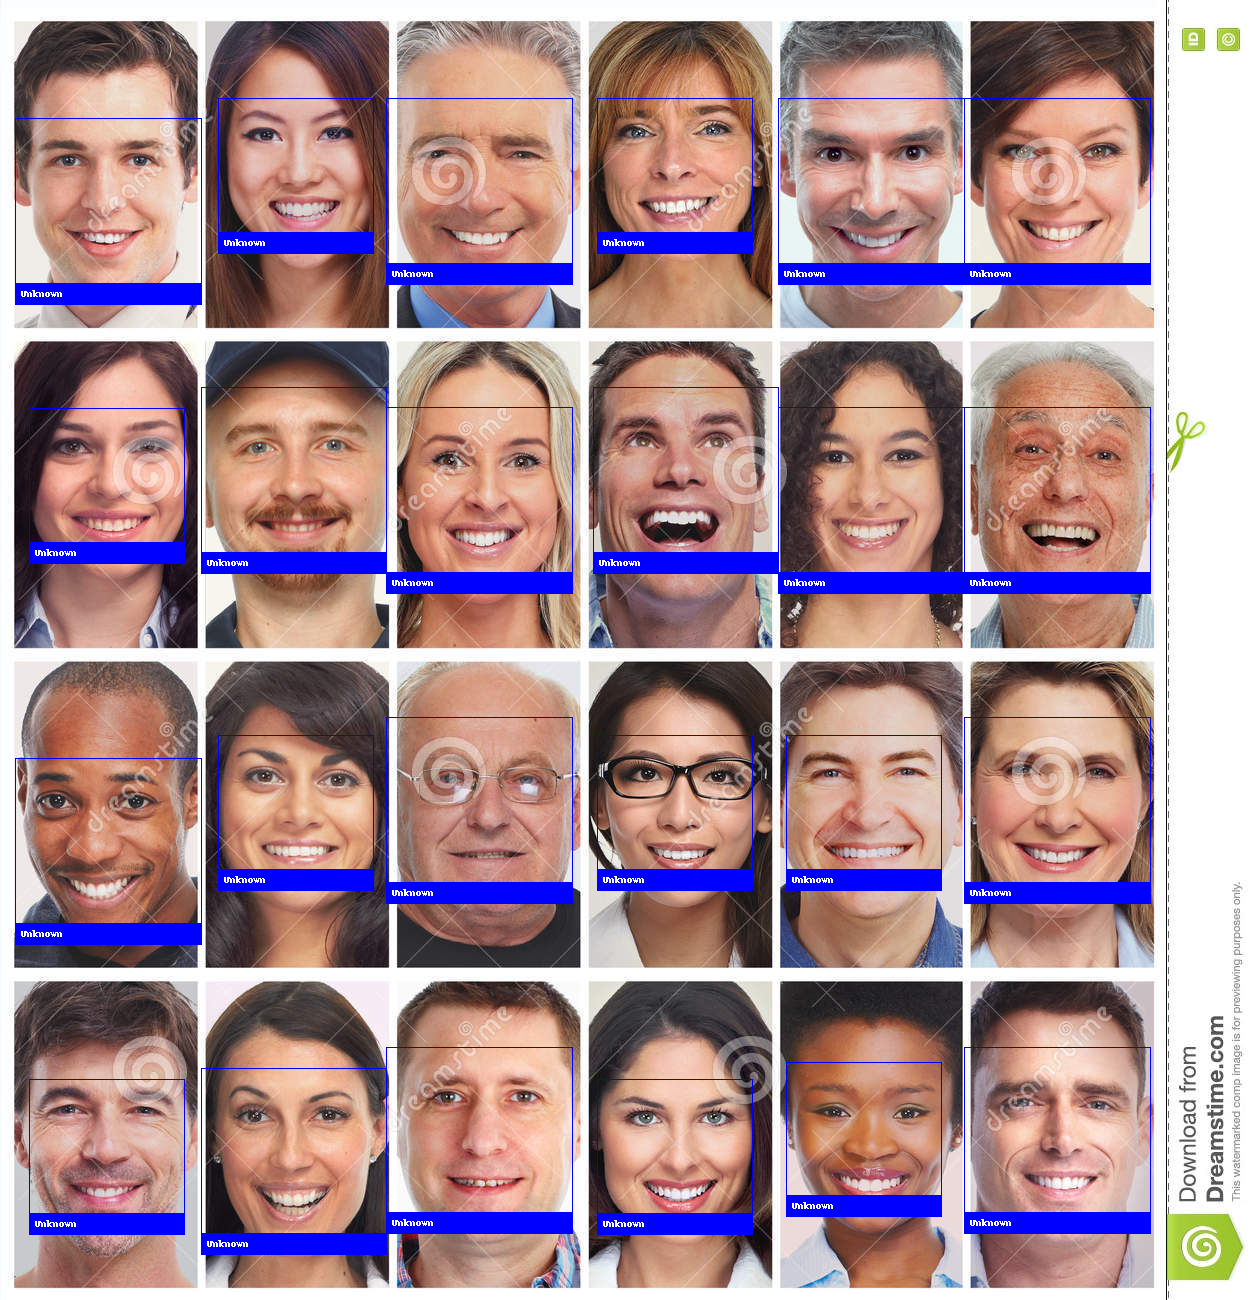

In [47]:
# Load an image with an unknown face
unknown_image = face_recognition.load_image_file(image_path)

# Find all the faces and face encodings in the unknown image
face_locations = face_recognition.face_locations(unknown_image)
face_encodings = face_recognition.face_encodings(unknown_image, face_locations)

# Convert the image to a PIL-format image so that we can draw on top of it with the Pillow library
# See http://pillow.readthedocs.io/ for more about PIL/Pillow
pil_image = Image.fromarray(unknown_image)
# Create a Pillow ImageDraw Draw instance to draw with
draw = ImageDraw.Draw(pil_image)

# Loop through each face found in the unknown image
for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
    # See if the face is a match for the known face(s)
    matches = face_recognition.compare_faces(known_face_encodings, face_encoding)

    name = "Unknown"

    # Or instead, use the known face with the smallest distance to the new face
    face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
    best_match_index = np.argmin(face_distances)
    if matches[best_match_index]:
        name = known_face_names[best_match_index]

    # Draw a box around the face using the Pillow module
    draw.rectangle(((left, top), (right, bottom)), outline=(0, 0, 255))

    # Draw a label with a name below the face
    text_width, text_height = draw.textsize(name)
    draw.rectangle(((left, bottom - text_height - 10), (right, bottom)), fill=(0, 0, 255), outline=(0, 0, 255))
    draw.text((left + 6, bottom - text_height - 5), name, fill=(255, 255, 255, 255))


# Remove the drawing library from memory as per the Pillow docs
del draw

# Display the resulting image
display(pil_image)

## Face Recogntion with Video (Fully downloading the video)

 1. Much Slower version, you need to provide the video as as input and for each frame it will do face detection and facial recognition as well, if you have provided any facial recognition personalities. 
 2. Output is also a video, without audio with a bounding box around the faces with the names.

In [31]:
video_path = "/home/knolly/Downloads/ShreyaBirthday.mp4"
nandan_image_path = "/home/knolly/Downloads/bg-2-ConvertImage.jpg"
shreya_image_path = "/home/knolly/Pictures/Shreya/IMG-20161127-WA0000.jpg"

In [32]:
import face_recognition
import cv2

# This is a demo of running face recognition on a video file and saving the results to a new video file.
#
# PLEASE NOTE: This example requires OpenCV (the `cv2` library) to be installed only to read from your webcam.
# OpenCV is *not* required to use the face_recognition library. It's only required if you want to run this
# specific demo. If you have trouble installing it, try any of the other demos that don't require it instead.

# Open the input movie file
input_movie = cv2.VideoCapture(video_path)
length = int(input_movie.get(cv2.CAP_PROP_FRAME_COUNT))

# Create an output movie file (make sure resolution/frame rate matches input video!)
fourcc = cv2.VideoWriter_fourcc(*'XVID')
output_movie = cv2.VideoWriter('output.avi', fourcc, 30, (1280, 720))

# Load some sample pictures and learn how to recognize them.
nandan_image = face_recognition.load_image_file(nandan_image_path)
nandan_face_encoding = face_recognition.face_encodings(nandan_image)[0]

shreya_image = face_recognition.load_image_file(shreya_image_path)
shreya_face_encoding = face_recognition.face_encodings(shreya_image)[0]

known_faces = [
    nandan_face_encoding,
    shreya_face_encoding
]

# Initialize some variables
face_locations = []
face_encodings = []
face_names = []
frame_number = 0

while True:
    # Grab a single frame of video
    ret, frame = input_movie.read()
    frame_number += 1

    # Quit when the input video file ends
    if not ret:
        break

    # Convert the image from BGR color (which OpenCV uses) to RGB color (which face_recognition uses)
    rgb_frame = frame[:, :, ::-1]

    # Find all the faces and face encodings in the current frame of video
    face_locations = face_recognition.face_locations(rgb_frame)
    face_encodings = face_recognition.face_encodings(rgb_frame, face_locations)

    face_names = []
    for face_encoding in face_encodings:
        # See if the face is a match for the known face(s)
        match = face_recognition.compare_faces(known_faces, face_encoding, tolerance=0.50)

        # If you had more than 2 faces, you could make this logic a lot prettier
        # but I kept it simple for the demo
        name = None
        if match[0]:
            name = "Nandan Thakur"
        elif match[1]:
            name = "Shreya Arya"

        face_names.append(name)

    # Label the results
    for (top, right, bottom, left), name in zip(face_locations, face_names):
        if not name:
            continue

        # Draw a box around the face
        cv2.rectangle(frame, (left, top), (right, bottom), (0, 0, 255), 2)

        # Draw a label with a name below the face
        cv2.rectangle(frame, (left, bottom - 25), (right, bottom), (0, 0, 255), cv2.FILLED)
        font = cv2.FONT_HERSHEY_DUPLEX
        cv2.putText(frame, name, (left + 6, bottom - 6), font, 0.5, (255, 255, 255), 1)

    # Write the resulting image to the output video file
    print("Writing frame {} / {}".format(frame_number, length))
    output_movie.write(frame)

# All done!
input_movie.release()
cv2.destroyAllWindows()

Writing frame 1 / 2202
Writing frame 2 / 2202
Writing frame 3 / 2202
Writing frame 4 / 2202
Writing frame 5 / 2202
Writing frame 6 / 2202
Writing frame 7 / 2202
Writing frame 8 / 2202
Writing frame 9 / 2202
Writing frame 10 / 2202
Writing frame 11 / 2202
Writing frame 12 / 2202
Writing frame 13 / 2202
Writing frame 14 / 2202
Writing frame 15 / 2202
Writing frame 16 / 2202
Writing frame 17 / 2202
Writing frame 18 / 2202
Writing frame 19 / 2202
Writing frame 20 / 2202
Writing frame 21 / 2202
Writing frame 22 / 2202
Writing frame 23 / 2202
Writing frame 24 / 2202
Writing frame 25 / 2202
Writing frame 26 / 2202
Writing frame 27 / 2202
Writing frame 28 / 2202
Writing frame 29 / 2202
Writing frame 30 / 2202
Writing frame 31 / 2202
Writing frame 32 / 2202
Writing frame 33 / 2202
Writing frame 34 / 2202
Writing frame 35 / 2202
Writing frame 36 / 2202
Writing frame 37 / 2202
Writing frame 38 / 2202
Writing frame 39 / 2202
Writing frame 40 / 2202
Writing frame 41 / 2202
Writing frame 42 / 2202
W

Writing frame 334 / 2202
Writing frame 335 / 2202
Writing frame 336 / 2202
Writing frame 337 / 2202
Writing frame 338 / 2202
Writing frame 339 / 2202
Writing frame 340 / 2202
Writing frame 341 / 2202
Writing frame 342 / 2202
Writing frame 343 / 2202
Writing frame 344 / 2202
Writing frame 345 / 2202
Writing frame 346 / 2202
Writing frame 347 / 2202
Writing frame 348 / 2202
Writing frame 349 / 2202
Writing frame 350 / 2202
Writing frame 351 / 2202
Writing frame 352 / 2202
Writing frame 353 / 2202
Writing frame 354 / 2202
Writing frame 355 / 2202
Writing frame 356 / 2202
Writing frame 357 / 2202
Writing frame 358 / 2202
Writing frame 359 / 2202
Writing frame 360 / 2202
Writing frame 361 / 2202
Writing frame 362 / 2202
Writing frame 363 / 2202
Writing frame 364 / 2202
Writing frame 365 / 2202
Writing frame 366 / 2202
Writing frame 367 / 2202
Writing frame 368 / 2202
Writing frame 369 / 2202
Writing frame 370 / 2202
Writing frame 371 / 2202
Writing frame 372 / 2202
Writing frame 373 / 2202


Writing frame 662 / 2202
Writing frame 663 / 2202
Writing frame 664 / 2202
Writing frame 665 / 2202
Writing frame 666 / 2202
Writing frame 667 / 2202
Writing frame 668 / 2202
Writing frame 669 / 2202
Writing frame 670 / 2202
Writing frame 671 / 2202
Writing frame 672 / 2202
Writing frame 673 / 2202
Writing frame 674 / 2202
Writing frame 675 / 2202
Writing frame 676 / 2202
Writing frame 677 / 2202
Writing frame 678 / 2202
Writing frame 679 / 2202
Writing frame 680 / 2202
Writing frame 681 / 2202
Writing frame 682 / 2202
Writing frame 683 / 2202
Writing frame 684 / 2202
Writing frame 685 / 2202
Writing frame 686 / 2202
Writing frame 687 / 2202
Writing frame 688 / 2202
Writing frame 689 / 2202
Writing frame 690 / 2202
Writing frame 691 / 2202
Writing frame 692 / 2202
Writing frame 693 / 2202
Writing frame 694 / 2202
Writing frame 695 / 2202
Writing frame 696 / 2202
Writing frame 697 / 2202
Writing frame 698 / 2202
Writing frame 699 / 2202
Writing frame 700 / 2202
Writing frame 701 / 2202


Writing frame 990 / 2202
Writing frame 991 / 2202
Writing frame 992 / 2202
Writing frame 993 / 2202
Writing frame 994 / 2202
Writing frame 995 / 2202
Writing frame 996 / 2202
Writing frame 997 / 2202
Writing frame 998 / 2202
Writing frame 999 / 2202
Writing frame 1000 / 2202
Writing frame 1001 / 2202
Writing frame 1002 / 2202
Writing frame 1003 / 2202
Writing frame 1004 / 2202
Writing frame 1005 / 2202
Writing frame 1006 / 2202
Writing frame 1007 / 2202
Writing frame 1008 / 2202
Writing frame 1009 / 2202
Writing frame 1010 / 2202
Writing frame 1011 / 2202
Writing frame 1012 / 2202
Writing frame 1013 / 2202
Writing frame 1014 / 2202
Writing frame 1015 / 2202
Writing frame 1016 / 2202
Writing frame 1017 / 2202
Writing frame 1018 / 2202
Writing frame 1019 / 2202
Writing frame 1020 / 2202
Writing frame 1021 / 2202
Writing frame 1022 / 2202
Writing frame 1023 / 2202
Writing frame 1024 / 2202
Writing frame 1025 / 2202
Writing frame 1026 / 2202
Writing frame 1027 / 2202
Writing frame 1028 / 2

Writing frame 1306 / 2202
Writing frame 1307 / 2202
Writing frame 1308 / 2202
Writing frame 1309 / 2202
Writing frame 1310 / 2202
Writing frame 1311 / 2202
Writing frame 1312 / 2202
Writing frame 1313 / 2202
Writing frame 1314 / 2202
Writing frame 1315 / 2202
Writing frame 1316 / 2202
Writing frame 1317 / 2202
Writing frame 1318 / 2202
Writing frame 1319 / 2202
Writing frame 1320 / 2202
Writing frame 1321 / 2202
Writing frame 1322 / 2202
Writing frame 1323 / 2202
Writing frame 1324 / 2202
Writing frame 1325 / 2202
Writing frame 1326 / 2202
Writing frame 1327 / 2202
Writing frame 1328 / 2202
Writing frame 1329 / 2202
Writing frame 1330 / 2202
Writing frame 1331 / 2202
Writing frame 1332 / 2202
Writing frame 1333 / 2202
Writing frame 1334 / 2202
Writing frame 1335 / 2202
Writing frame 1336 / 2202
Writing frame 1337 / 2202
Writing frame 1338 / 2202
Writing frame 1339 / 2202
Writing frame 1340 / 2202
Writing frame 1341 / 2202
Writing frame 1342 / 2202
Writing frame 1343 / 2202
Writing fram

Writing frame 1622 / 2202
Writing frame 1623 / 2202
Writing frame 1624 / 2202
Writing frame 1625 / 2202
Writing frame 1626 / 2202
Writing frame 1627 / 2202
Writing frame 1628 / 2202
Writing frame 1629 / 2202
Writing frame 1630 / 2202
Writing frame 1631 / 2202
Writing frame 1632 / 2202
Writing frame 1633 / 2202
Writing frame 1634 / 2202
Writing frame 1635 / 2202
Writing frame 1636 / 2202
Writing frame 1637 / 2202
Writing frame 1638 / 2202
Writing frame 1639 / 2202
Writing frame 1640 / 2202
Writing frame 1641 / 2202
Writing frame 1642 / 2202
Writing frame 1643 / 2202
Writing frame 1644 / 2202
Writing frame 1645 / 2202
Writing frame 1646 / 2202
Writing frame 1647 / 2202
Writing frame 1648 / 2202
Writing frame 1649 / 2202
Writing frame 1650 / 2202
Writing frame 1651 / 2202
Writing frame 1652 / 2202
Writing frame 1653 / 2202
Writing frame 1654 / 2202
Writing frame 1655 / 2202
Writing frame 1656 / 2202
Writing frame 1657 / 2202
Writing frame 1658 / 2202
Writing frame 1659 / 2202
Writing fram

Writing frame 1938 / 2202
Writing frame 1939 / 2202
Writing frame 1940 / 2202
Writing frame 1941 / 2202
Writing frame 1942 / 2202
Writing frame 1943 / 2202
Writing frame 1944 / 2202
Writing frame 1945 / 2202
Writing frame 1946 / 2202
Writing frame 1947 / 2202
Writing frame 1948 / 2202
Writing frame 1949 / 2202
Writing frame 1950 / 2202
Writing frame 1951 / 2202
Writing frame 1952 / 2202
Writing frame 1953 / 2202
Writing frame 1954 / 2202
Writing frame 1955 / 2202
Writing frame 1956 / 2202
Writing frame 1957 / 2202
Writing frame 1958 / 2202
Writing frame 1959 / 2202
Writing frame 1960 / 2202
Writing frame 1961 / 2202
Writing frame 1962 / 2202
Writing frame 1963 / 2202
Writing frame 1964 / 2202
Writing frame 1965 / 2202
Writing frame 1966 / 2202
Writing frame 1967 / 2202
Writing frame 1968 / 2202
Writing frame 1969 / 2202
Writing frame 1970 / 2202
Writing frame 1971 / 2202
Writing frame 1972 / 2202
Writing frame 1973 / 2202
Writing frame 1974 / 2202
Writing frame 1975 / 2202
Writing fram

## Face Recognition with video with display results in real-time (MUCH FASTER)

- Need to figure out what all metadata to store and would be valuable at the moment.

In [54]:
%pylab inline 
import face_recognition
import cv2
import matplotlib.patches as patches
from IPython.display import clear_output
from matplotlib.pyplot import imshow
import matplotlib.pylab as plt

Populating the interactive namespace from numpy and matplotlib


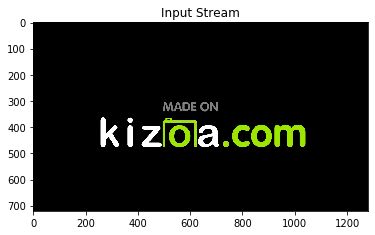

In [55]:
# Loading video for face detection
video_capture = cv2.VideoCapture(video_path)

frame_count = 0

while video_capture.isOpened():    
    # Grab a single frame of video
    ret, frame = video_capture.read()

    # Bail out when the video file ends
    if not ret:
        video_capture.release()
        break
        
    # We will search face in every 15 frames to speed up process.
    frame_count += 1
    if frame_count % 15 == 0:    
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        
        # Display video frame
        title("Input Stream")
        plt.imshow(frame)        

        # Find all the faces and face encodings in the current frame of video
        rgb_frame = frame[:, :, ::-1]
        face_locations = face_recognition.face_locations(rgb_frame)
        
        # If faces were found, we will mark it on frame with blue dots
        for face_location in face_locations:        
            plt.plot(face_location[1], face_location[0], 'bo')
            plt.plot(face_location[1], face_location[2], 'bo')
            plt.plot(face_location[3], face_location[2], 'bo')
            plt.plot(face_location[3], face_location[0], 'bo')

        # Show frame...
        plt.show() 
        # ... and hold it until a new frame appears
        clear_output(wait=True)